In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-03-20 16:56:31,474 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:b1:6a:38:3C
2023-03-20 16:56:35,264 | INFO     |: Connected to C0:83:b1:6a:38:3C


D:\Workspace\ECE-5160-Sp23\ble_robot-1.1\ble_python\base_ble.py:87: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [3]:
def get_data_cb(uuid, byte_array):
    global tof_list, pwm_list
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        if s[0] == 'T':
            # TOF
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                tof  = int(data[1])
                if tof > 0:
                    tof_time_list.append(time)
                    tof_data_list.append(tof)
        else:
            # PWM
            readings = s[1].split(',')[:-1]
            for data in readings:
                data = data.split('&')
                time = int(data[0])
                pwm  = int(data[1])
                if pwm > 0:
                    pwm_time_list.append(time)
                    pwm_data_list.append(pwm)

In [4]:
ble.start_notify(ble.uuid['RX_STRING'], get_data_cb)

In [5]:
tof_data_list = []
pwm_data_list = []
tof_time_list = []
pwm_time_list = []


In [6]:
# start
ble.send_command(CMD.SEND_TWO_INTS, "")

In [7]:
# stop
ble.send_command(CMD.SEND_THREE_FLOATS, "")

In [8]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [9]:
tof_time_list = [x - tof_time_list[0] for x in tof_time_list]
pwm_time_list = [x - pwm_time_list[0] for x in pwm_time_list]

In [10]:
print(tof_data_list)
print(tof_time_list)

[1863, 1832, 1812, 1793, 1779, 1739, 1696, 1648, 1598, 1533, 1471, 1405, 1320, 1245, 1170, 1097, 1018, 950, 882, 818, 753, 686, 618, 557, 510, 472, 443, 421, 403, 382, 370, 360, 352, 343, 334, 328, 321, 313, 303, 296, 287, 279, 269, 263, 256, 252, 251, 249, 247, 246, 248, 250, 247, 248, 248, 249, 247, 248, 248, 248, 247, 249, 248, 248, 248, 248, 247, 249, 248, 248, 248, 248, 247, 246, 247, 247, 248, 249, 249, 249, 247, 247, 249, 246, 249, 248, 249, 246, 247, 246, 247, 247, 248, 249, 247, 246, 248, 249, 249, 247, 248, 248, 248, 248, 248, 247, 247, 248, 248, 247, 249, 249, 247, 248, 246, 248, 247, 245, 247, 247, 247, 247, 247, 247]
[0, 67, 129, 201, 270, 335, 402, 468, 536, 603, 666, 730, 798, 866, 931, 999, 1065, 1126, 1188, 1247, 1310, 1378, 1444, 1503, 1567, 1627, 1698, 1764, 1837, 1906, 1966, 2031, 2090, 2147, 2210, 2267, 2337, 2402, 2469, 2536, 2605, 2667, 2741, 2804, 2871, 2941, 3006, 3073, 3139, 3201, 3263, 3330, 3390, 3462, 3524, 3583, 3645, 3705, 3770, 3834, 3898, 3968, 4031, 40

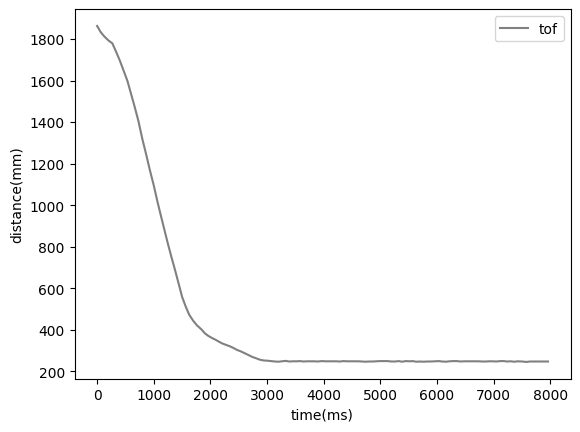

In [11]:
plt.plot(tof_time_list, tof_data_list, color='gray', label='tof')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('distance(mm)')
plt.show()

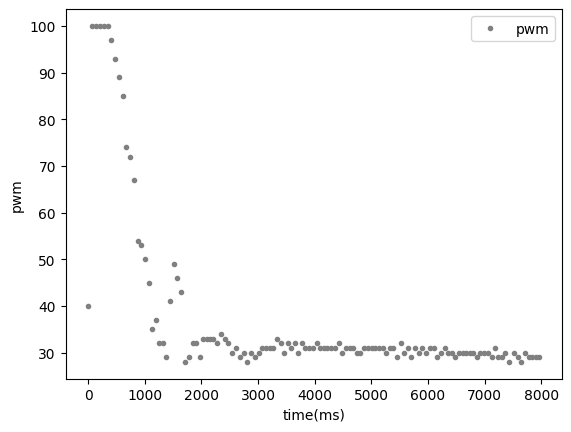

2023-03-20 16:57:39,289 | INFO     |: Disconnected from C0:83:b1:6a:38:3C


In [13]:
plt.plot(pwm_time_list, pwm_data_list, '.', color='gray', label='pwm')
plt.legend(loc="upper right")
plt.xlabel('time(ms)')
plt.ylabel('pwm')
plt.show()

In [ ]:
# Disconnect
ble.disconnect()